In [12]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
import cmath as cm
import pathlib
from numpy.ma.core import shape

sys.path.insert(0, '/Users/sam/PycharmProjects/Quantum-Control/NewModule')
from arc import *  # Import ARC (Alkali Rydberg Calculator)

In [13]:
calc = StarkMap(Calcium40())
#x%matplotlib qt

# Target state
n0 = 35
l0 = 3
j0 = 3
mj0 = 0
s0 = 0
 # Define max/min n values in basis
nmin = n0 - 3
nmax = n0 + 3


# Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax = nmax-1 #nmax-1

# Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True, s=s0)

Emin = -100.0e2  # Min E field (V/m)
Emax = 100.0e2  # Max E field (V/m)
N = 501  # Number of Points
E_array = np.linspace(Emin, Emax, N)  # E field array
# Generate Stark Map
calc.diagonalise(E_array, progressOutput=True,debugOutput=True, upTo = -1)
binary_matrix_diagonal = 'bi_diagonal.npy'

4.0 0.0 0.0 0.0 0.0
4.0 1.0 0.0 1.0 15157.901
4.0 1.0 1.0 1.0 15210.063
4.0 1.0 2.0 1.0 15315.943
4.0 1.0 1.0 0.0 23652.304
5.0 0.0 1.0 1.0 31539.495
5.0 0.0 0.0 0.0 33317.264
5.0 1.0 0.0 1.0 36547.688
5.0 1.0 1.0 1.0 36554.749
5.0 1.0 2.0 1.0 36575.119
5.0 1.0 1.0 0.0 36731.615
4.0 2.0 2.0 0.0 37298.287
4.0 2.0 1.0 1.0 37748.197
4.0 2.0 2.0 1.0 37751.867
4.0 2.0 3.0 1.0 37757.449
5.0 2.0 2.0 0.0 42919.053
6.0 2.0 2.0 0.0 44989.83
7.0 2.0 2.0 0.0 46200.13
8.0 2.0 2.0 0.0 46948.98
9.0 2.0 2.0 0.0 47812.39
10.0 2.0 2.0 0.0 48083.41
11.0 2.0 2.0 0.0 48290.85
12.0 2.0 2.0 0.0 48451.73
13.0 2.0 2.0 0.0 48578.32
14.0 2.0 2.0 0.0 48678.97
15.0 2.0 2.0 0.0 48760.14
16.0 2.0 2.0 0.0 48827.05
17.0 2.0 2.0 0.0 48882.37
18.0 2.0 2.0 0.0 48928.79
19.0 2.0 2.0 0.0 48968.1
20.0 2.0 2.0 0.0 49001.66
20.0 3.0 3.0 0.0 49028.943
21.0 2.0 2.0 0.0 49030.55
21.0 3.0 3.0 0.0 49054.802
22.0 2.0 2.0 0.0 49055.62
22.0 3.0 3.0 0.0 49077.203
23.0 3.0 3.0 0.0 49096.736
23.0 2.0 2.0 0.0 49096.52
24.0 3.0 3.0 0.0 49

Each stark state can be written as a sum over the atomic states $\ket{i}=\sum_k \ket{k}$. The idea is too see what is the most interesting stark state, meaning what is the stark state that has the highest coefficient associated to the level we are interested in.


0
[]


ValueError: x and y must have same first dimension, but have shapes (501,) and (0,)

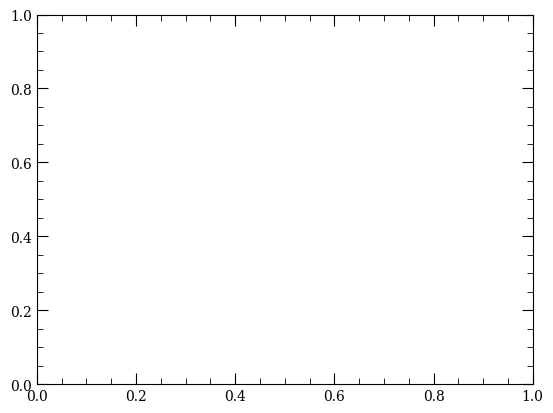

In [11]:
pop_20 = []
for idx in range(len(calc.basisStates)):
    if calc.basisStates[idx][0] == 35 and calc.basisStates[idx][1] == 20:
        pop_20_idx = idx
        break
for field in E_array:
    for idx,state in enumerate(calc.composition[idx]):
        if state[1] == pop_20_idx:
            pop_20.append(state[pop_20_idx])
            break
print(pop_20)
plt.plot(E_array, pop_20)
plt.xlabel('Electric Field (V/m)')
plt.ylabel('Population of |35,20,>')
plt.show()
        
    
